## Requirement Information


#### We need to get count of all the possible words in given language. 
#### and than filter those words which are having meaningful to given language.

#### 1. English Language Experiment

description : 
1. english language having total Alphabets of 26, which we need to check the all possible words by permutation method.
2. we need to define the minimum word length and maximum word length to make the permutations

In [24]:
from math import factorial
from itertools import permutations
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def calculate_total_possible_words(number_of_alphabets, maximum_word_length, minimum_word_length=1):
    """
        function will calculate the possible word count for given parameters.
        permutation formula : nPr ----------> aPw
        where  :
                a - number_of_alphabets
                w - word_length
                
        condition           : n ≥ r ≥ 0
    """
    """
        issue : now english have 26 alphabets, but word length can have more than 27 chars, so here permutation logic false, so the below graph values showing.
        
    """

    possible_word_counts = []
    for word_length in range(minimum_word_length, maximum_word_length):
        possible_word_counts.append({
            "number_of_alphabets" : number_of_alphabets,
            "required_word_lenght" : word_length,
            "permutation" : factorial(number_of_alphabets) / factorial(abs(number_of_alphabets - word_length))
        })
        
    return possible_word_counts

In [48]:
number_of_alphabets = 26
minimum_word_length = 1
maximum_word_length = 100

possible_words = calculate_total_possible_words(number_of_alphabets, maximum_word_length, minimum_word_length)
possible_words = pd.DataFrame(possible_words)
possible_words.head()

,number_of_alphabets,required_word_lenght,permutation
0,26,1,26.0
1,26,2,650.0
2,26,3,15600.0
3,26,4,358800.0
4,26,5,7893600.0


In [49]:
## given 'required_word_lenght' we need to find how many are meaning words are present in given language.
## currently keeping the placeholder, adding new column 'actual_word_counts', later need to find and fill the counts.

possible_words["actual_word_counts"] = 0

Text(0.5, 1.0, 'english lanuage specific word counts')

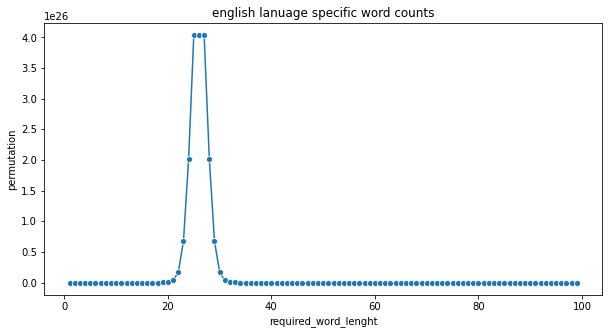

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data=possible_words, x="required_word_lenght", y="permutation", marker="o")

ax.set_title("english lanuage specific word counts" , size = 12)

In [3]:
## Note : 0 values coming as permuation issue. we are trying to calculate permutation of 26P27
## we need to find solution for all possibel word count.

### Generate all possible words of given length

In [21]:
def generate_possible_words(all_alphabets, maximum_word_length, minimum_word_length=1):
    
    number_of_alphabets = len(all_alphabets)
    possible_words = []
    for word_length in range(minimum_word_length, maximum_word_length+1):
        possible_words.append({
            "number_of_alphabets" : number_of_alphabets,
            "required_word_lenght" : word_length,
            "word_permutation" : ["".join(word) for word in permutations(all_alphabets, r=word_length)]
        })
        
    return possible_words

In [26]:
english_alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y","z"]
max_word_len = 3
min_word_len = 1
generated_words = generate_possible_words(all_alphabets = english_alphabets, maximum_word_length=max_word_len)

In [29]:
filepath = f"generated_words//max_words_{max_word_len}-min_words_{min_word_len}.json"
with open(filepath, "w") as fp:
    json.dump(generated_words, fp)
